<a href="https://colab.research.google.com/github/ADVAIT135/Global_AI_ML/blob/main/Ai_global_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('/content/Live.csv')

In [4]:
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [6]:
model.fit(data)

KMeans(n_clusters=3)

In [8]:
labels = model.predict(data)
labels

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [11]:
np.unique(labels,return_counts = True)

(array([0, 1, 2], dtype=int32), array([4288, 2334,  428]))

In [12]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [15]:
silhouettes = []
ks = list(range(2,12))


In [19]:
for n_cluster in ks:
  kmeans = KMeans(n_clusters  = n_cluster).fit(data)
  label = kmeans.labels_
  sil_coff = silhouette_score(data, label, metric = 'euclidean')
  print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster,sil_coff))
  silhouettes.append(sil_coff)

For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822
For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883
For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088
For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754
For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796
For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257
For n_clusters=8, The Silhouette Coefficient is 0.8370052625268489
For n_clusters=9, The Silhouette Coefficient is 0.7610220186092415
For n_clusters=10, The Silhouette Coefficient is 0.7269839222913216
For n_clusters=11, The Silhouette Coefficient is 0.7216993623311859


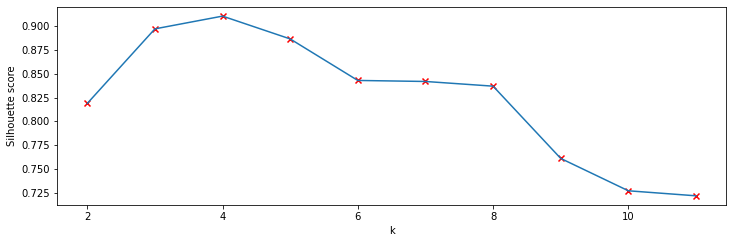

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker = 'x', c = 'r')
plt.plot(ks,silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

In [23]:
from sklearn.cluster import KMeans
model_1 = KMeans(n_clusters=4)
model_1.fit(data)
labels_1 = model_1.predict(data)
np.unique(labels_1, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([2334, 4288,  365,   63]))

In [26]:
data['labels'] = labels_1
data['labels'].value_counts()

1    4288
0    2334
2     365
3      63
Name: labels, dtype: int64

In [27]:
group_zero = data[data['labels'] == 0]['num_comments'].mean()
group_zero

0.030608773182480054

In [28]:
group_one = data[data['labels'] == 1]['num_comments'].mean()
group_one

0.0007619566531325948

In [29]:
group_two = data[data['labels'] == 2]['num_comments'].mean()
group_two

0.0017264581307471548

In [30]:
group_three = data[data['labels'] == 3]['num_comments'].mean()
group_three

0.00027148226290672723

In [33]:
group_zero_sh = data[data['labels'] == 0]['num_shares'].mean()

group_one_sh = data[data['labels'] == 1]['num_shares'].mean()

group_two_sh = data[data['labels'] == 2]['num_shares'].mean()

group_three_sh = data[data['labels'] == 3]['num_shares'].mean()
group_zero_sh,group_one_sh,group_two_sh,group_three_sh

(0.033785031713235436,
 0.0007458736181824375,
 0.0007473434899500528,
 0.001284119566829822)

In [35]:
status_type = data[['status_type_photo','status_type_video','status_type_status']].idxmax(axis =1)
data = pd.concat([data['labels'], status_type.rename('status_type')], axis = 1)

In [36]:
data.groupby(['labels','status_type',])['status_type'].count()

labels  status_type       
0       status_type_video     2334
1       status_type_photo     4288
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64